## **Rede de Camada Simples - Dados linearmente separáveis**

In [15]:
#Importando bibliotecas
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd

In [16]:
## DECLARAÇÃO DAS FUNÇÕES

# Cria o perceptron
def yperceptron(W,b,X):
  # Calcula a função aditiva, multiplicando a matriz de peso (W) pela matriz de entradas
  u = np.dot(W,X) + b
  # Loop for para percorrer a matriz e aplicar a função de ativação, neste caso sendo a função degrau/limiar
  for i in range(u.shape[1]):
      if u[0, i] >= 0:
          u[0, i] = 1
      else:
          u[0, i] = 0
  return u

# Função de treinamento do Perceptron
def treina_perceptron(W, b, X, yd_p, alfa, maxepocas, tol):
  epoca = 1 #Inicia a contagem de épocas, a variável é um contador que incrementa até o número máximo de épocas
  N = X.shape[1] #Determina a quantidade de amostras a serem treinadas baseado no número de colunas de X
  print(f'N={N}')
  SEQ = tol #Inicializa a soma dos erros quadrados com o valor de tolerância
  vetor_seq = [] #Lista para armazenar a soma dos erros quadrados de cada época
  while ((epoca <= maxepocas) and (SEQ >= tol)): #O treinamento continua até que o erro esteja abaixo da tolerância ou até atingir o número máximo de épocas
    SEQ = 0 #Zera a soma dos erros quadrados no início de cada época
    for i in range(0, N):
      y = yperceptron(W, b, X[:,[i]])  #Calcula a saída do adaline, retornando para y apenas um valor
      erro = yd_p[0, i] -y  #Calcula o erro da saída atual em relação à saída desejada. Esse erro é usado para ajustar os pesos usando a regra delta
      W = W + alfa*erro*X[:,i].T  #o ajuste é a taxa de aprendizado alfa vezes o erro calculado, multiplicado pela amostra que gerou o erro. É preciso fazer o transposto para que o cálculo aconteça
      b = b + alfa*erro  #Ajusta o bias usando a regra delta
      SEQ = SEQ + erro[0]**2  #Acumula o erro quadrado para esta amostra. FIM DO FOR
      ### IDEAL CHAMAR A FUNÇÃO MISTURA AQUI ###
    print(f'SEQ = {SEQ[0]} na Epoca {epoca}') #Exibe o erro quadrado acumulado para esta época
    epoca = epoca + 1 #Avança para a próxima época
    vetor_seq.append(SEQ[0]) #Armazena o erro quadrado acumulado desta época. Fim do WHILE
  return W, b, vetor_seq

# Função de treinamento do Perceptron com momento
def treina_perceptron_momentum(W,b,X,yd,alfa,maxepocas,tol,beta):
  epoca = 1
  N = X.shape[1] # Número de amostras na matriz de dados
  print(f'N = {N}')
  SEQ = tol #Inicializa a soma dos erros quadrados com o valor de tolerância
  vetor_seq = [] #Lista para armazenar a soma dos erros quadrados (SEQ) de cada época
  W_antigo = W
  W_atual = W
  b_antigo = b
  b_atual = b

  while ((epoca <= maxepocas) and (SEQ >= tol)):
    #print("foi")
    SEQ = 0
    for i in range(0,N):
      y = yperceptron(W_atual,b_atual,X[:,i])
      #print('y: ', y.shape)
      erro = yd[i] - y
      #print('erro: ', erro.shape)

      # Regra delta/Gradiente descendente com momento
      W_futuro = W_atual + alfa * erro * X[:,i].T + beta*(W_atual - W_antigo) # Calcular novos pesos W com momento
      b_futuro = b_atual + alfa * erro + beta*(b_atual - b_antigo) # Calcular novo bias com momento
      W_antigo = W_atual
      b_antigo = b_atual
      W_atual = W_futuro
      b_atual = b_futuro
      SEQ = SEQ + erro**2 # Somatório dos erros quadráticos
      #print('SEQ: ', SEQ.shape)



    print(f'SEQ = {SEQ[0]} na Epoca {epoca}')
    epoca = epoca + 1
    vetor_seq.append(SEQ[0])
  return [W_futuro,b_futuro,vetor_seq]

def geragauss(nc,npc,mc,varc):
  X, yd = make_blobs(n_samples=npc, centers=mc, n_features=nc,cluster_std=np.sqrt(varc))

  return X, yd

def mistura(X,yd):
  p = np.random.permutation(len(X))
  xp,yp = X[p], yd[p]
  return xp,yp

def converte_dec_bin(yd):
  N = yd.shape[1]
  c = int(np.max(yd))+1
  yb = np.zeros((c,N),dtype=int)
  for i in range(N):
    num = int(yd[0,i])
    yb[num,i] = 1
  return yb

def plotadc2d(X,y,color,laberl_var):
  plt.scatter(X[0,:],X[1,:],c=y)

def plotareta(W,b,intervalo, cor, label):
  x1 = np.linspace(intervalo[0],intervalo[1],num=10)
  x2 = -(W[0,0]*x1+b)/W[0,1]
  plt.plot(x1.T,x2.T, cor, label=label)

In [27]:
npc=[500,500,500]
mc=[[10,25],[5,10],[20,5]]
nc=3
varc=[1.5,1.5,1]

X,yd = geragauss(nc,npc,mc,varc)
X,yd = mistura(X,yd)
'''
X_T = X[np.newaxis]
yd_T = yd[np.newaxis]
'''

'\nX_T = X[np.newaxis]\nyd_T = yd[np.newaxis]\n'

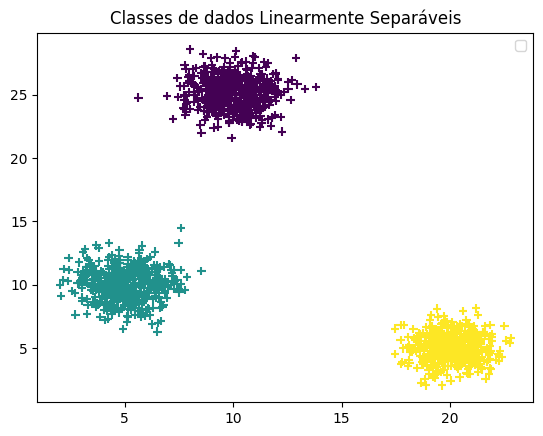

In [28]:
plt.figure()
plt.scatter(X.T[0,:],X.T[1,:],marker = '+', c = yd)
plt.title('Classes de dados Linearmente Separáveis')
plt.legend()
plt.show()

In [29]:
# Convert yd to dataframe
df_yd = pd.DataFrame(yd)
# Rename df column
df_yd = df_yd.rename(columns={0: "Classe"})
# Change column type to object so get_dummies can work
df_yd = df_yd.astype(object)
# Transforms categorical data in binary
yd_dummies = pd.get_dummies(df_yd)
# Convert df to array
yd_dummies = yd_dummies.to_numpy()

## DECLARAÇÃO DAS VARIÁVEIS
alfa = 0.0001 # alfa is the learning rate during the training
maxepocas = 100
tol = 10**-9 # Max error tolerance for perceptron training

beta = 0.8

W = (np.array(np.random.rand(1 , 2))*2)-1 # Random values for weight (W) between -1 and 1
b = (np.array(np.random.rand(1 , 1))*2)-1 # Bias variable

<ipython-input-29-ae31100aaec0>:8: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  yd_dummies = pd.get_dummies(df_yd)


In [30]:
'''
b.shape
W.shape
X.T.shape
yd_dummies[:,0].shape
np.dot(W,X.T) + b
'''

'\nb.shape\nW.shape\nX.T.shape\nyd_dummies[:,0].shape\nnp.dot(W,X.T) + b\n'

In [31]:
# Train perceptron #1

W_perceptron_momentum1, b_perceptron_momentum1, vetor_seq_perceptron_momentum1 = treina_perceptron_momentum(W, b, X.T, yd_dummies[:,0], alfa, maxepocas, tol, beta)
print(f'Pesos após o treinamento : W = {W_perceptron_momentum1}, b = {b_perceptron_momentum1}')

# Train perceptron #2

W_perceptron_momentum2, b_perceptron_momentum2, vetor_seq_perceptron_momentum2 = treina_perceptron_momentum(W, b, X.T, yd_dummies[:,1], alfa, maxepocas, tol, beta)
print(f'Pesos após o treinamento : W = {W_perceptron_momentum2}, b = {b_perceptron_momentum2}')

# Train perceptron #3

W_perceptron_momentum3, b_perceptron_momentum3, vetor_seq_perceptron_momentum3 = treina_perceptron_momentum(W, b, X.T, yd_dummies[:,2], alfa, maxepocas, tol, beta)
print(f'Pesos após o treinamento : W = {W_perceptron_momentum3}, b = {b_perceptron_momentum3}')

N = 1500
SEQ = [117.] na Epoca 1
SEQ = [0.] na Epoca 2
Pesos após o treinamento : W = [[0.01875122 0.04337984]], b = [[-0.84408429]]
N = 1500
SEQ = [670.] na Epoca 1
SEQ = [719.] na Epoca 2
SEQ = [722.] na Epoca 3
SEQ = [714.] na Epoca 4
SEQ = [707.] na Epoca 5
SEQ = [643.] na Epoca 6
SEQ = [456.] na Epoca 7
SEQ = [119.] na Epoca 8
SEQ = [96.] na Epoca 9
SEQ = [73.] na Epoca 10
SEQ = [96.] na Epoca 11
SEQ = [0.] na Epoca 12
Pesos após o treinamento : W = [[-0.00928028 -0.00355094]], b = [[0.12491571]]
N = 1500
SEQ = [46.] na Epoca 1
SEQ = [1.] na Epoca 2
SEQ = [0.] na Epoca 3
Pesos após o treinamento : W = [[ 0.38878402 -0.81589298]], b = [[-0.84708429]]


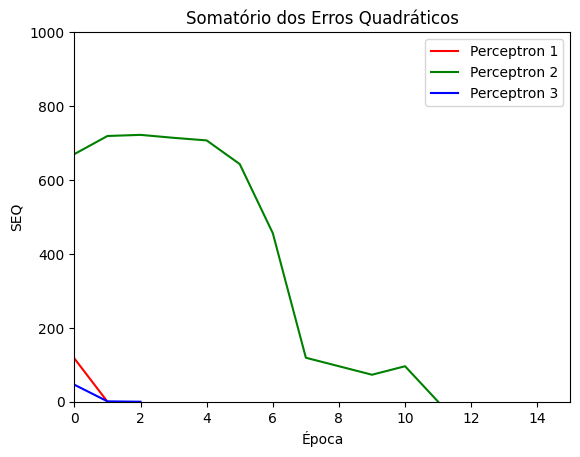

In [34]:
# Plotar o Somatório dos Erros Quadráticos (SEQ) ao longo das épocas para cada perceptron
plt.plot(vetor_seq_perceptron_momentum1, 'r-', label='Perceptron 1')
plt.plot(vetor_seq_perceptron_momentum2, 'g-', label='Perceptron 2')
plt.plot(vetor_seq_perceptron_momentum3, 'b-', label='Perceptron 3')
plt.xlim((0,15))
plt.ylim((0,1000))
plt.xlabel('Época')
plt.ylabel('SEQ')
plt.title('Somatório dos Erros Quadráticos')
plt.legend()
plt.show()

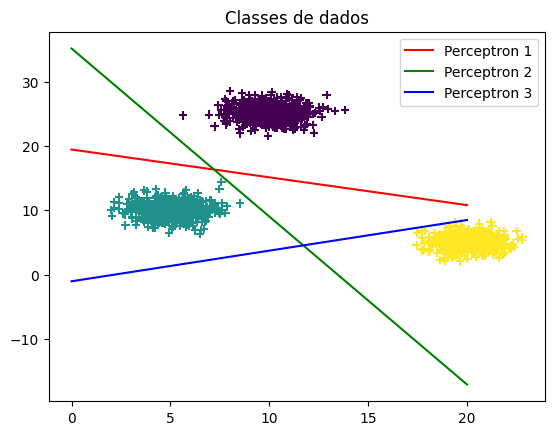

In [35]:
intervalo = [0,20] # Intervalo para plotar a reta de fronteira de decisão

# Plotar gráfico com as retas de decisão dos três perceptrons
plt.figure()
plt.scatter(X.T[0,:],X.T[1,:],marker = '+', c = yd)
plt.title('Classes de dados')

# Plotar a reta do perceptron 1
plotareta(W_perceptron_momentum1, b_perceptron_momentum1, intervalo,'r-','Perceptron 1')
# Plotar a reta do perceptron 2
plotareta(W_perceptron_momentum2, b_perceptron_momentum2, intervalo,'g-','Perceptron 2')
# Plotar a reta do perceptron 3
plotareta(W_perceptron_momentum3, b_perceptron_momentum3, intervalo,'b-','Perceptron 3')

plt.legend()
plt.show()

## **Rede de Camada Simples - Dados não linearmente separáveis**

In [36]:
npc=[500,500,500]
mc=[[9,10],[5,7],[11,6]]
nc=3
varc=[3,1.5,1]

X,yd = geragauss(nc,npc,mc,varc)
X,yd = mistura(X,yd)
'''
X_T = X[np.newaxis]
yd_T = yd[np.newaxis]
'''

'\nX_T = X[np.newaxis]\nyd_T = yd[np.newaxis]\n'

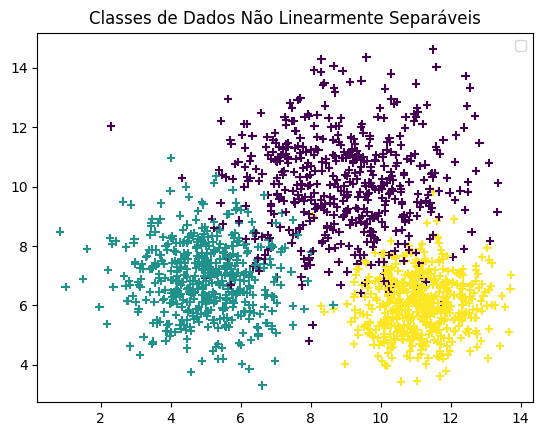

In [37]:
plt.figure()
plt.scatter(X.T[0,:],X.T[1,:],marker = '+', c = yd)
plt.title('Classes de Dados Não Linearmente Separáveis')
plt.legend()
plt.show()

In [38]:
# Convert yd to dataframe
df_yd = pd.DataFrame(yd)
# Rename df column
df_yd = df_yd.rename(columns={0: "Classe"})
# Change column type to object so get_dummies can work
df_yd = df_yd.astype(object)
# Transforms categorical data in binary
yd_dummies = pd.get_dummies(df_yd)
# Convert df to array
yd_dummies = yd_dummies.to_numpy()

## DECLARAÇÃO DAS VARIÁVEIS
alfa = 0.0001 # O valor de alfa dita o passo de ajuste dos pesos
maxepocas = 100
tol = 10**-9 # tol é a tolerancia máxima estabelecida para o erro no treinamento

beta = 0.8

W = (np.array(np.random.rand(1 , 2))*2)-1 # Criar variável W com os pesos randômicos entre -1 e 1 (*2-1 é a operação para mover o range do rand de 0 a 1 para -1 a 1)
b = (np.array(np.random.rand(1 , 1))*2)-1 # A variável b é o bias, que tem o objetivo variar a influência das entradas

<ipython-input-38-0c027765a1ea>:8: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  yd_dummies = pd.get_dummies(df_yd)


In [39]:
'''
b.shape
W.shape
X.T.shape
yd_dummies[:,0].shape
np.dot(W,X.T) + b
'''

'\nb.shape\nW.shape\nX.T.shape\nyd_dummies[:,0].shape\nnp.dot(W,X.T) + b\n'

In [40]:
# Train perceptron #1

W_perceptron_momentum1, b_perceptron_momentum1, vetor_seq_perceptron_momentum1 = treina_perceptron_momentum(W, b, X.T, yd_dummies[:,0], alfa, maxepocas, tol, beta)
print(f'Pesos após o treinamento : W = {W_perceptron_momentum1}, b = {b_perceptron_momentum1}')  #Exibe os pesos e bias finais após o treinamento

# Train perceptron #2

W_perceptron_momentum2, b_perceptron_momentum2, vetor_seq_perceptron_momentum2 = treina_perceptron_momentum(W, b, X.T, yd_dummies[:,1], alfa, maxepocas, tol, beta)
print(f'Pesos após o treinamento : W = {W_perceptron_momentum2}, b = {b_perceptron_momentum2}')  #Exibe os pesos e bias finais após o treinamento

# Train perceptron #3

W_perceptron_momentum3, b_perceptron_momentum3, vetor_seq_perceptron_momentum3 = treina_perceptron_momentum(W, b, X.T, yd_dummies[:,2], alfa, maxepocas, tol, beta)
print(f'Pesos após o treinamento : W = {W_perceptron_momentum3}, b = {b_perceptron_momentum3}')  #Exibe os pesos e bias finais após o treinamento

N = 1500
SEQ = [369.] na Epoca 1
SEQ = [152.] na Epoca 2
SEQ = [148.] na Epoca 3
SEQ = [150.] na Epoca 4
SEQ = [154.] na Epoca 5
SEQ = [158.] na Epoca 6
SEQ = [151.] na Epoca 7
SEQ = [146.] na Epoca 8
SEQ = [148.] na Epoca 9
SEQ = [161.] na Epoca 10
SEQ = [152.] na Epoca 11
SEQ = [148.] na Epoca 12
SEQ = [151.] na Epoca 13
SEQ = [158.] na Epoca 14
SEQ = [161.] na Epoca 15
SEQ = [150.] na Epoca 16
SEQ = [157.] na Epoca 17
SEQ = [160.] na Epoca 18
SEQ = [161.] na Epoca 19
SEQ = [155.] na Epoca 20
SEQ = [157.] na Epoca 21
SEQ = [165.] na Epoca 22
SEQ = [156.] na Epoca 23
SEQ = [155.] na Epoca 24
SEQ = [152.] na Epoca 25
SEQ = [155.] na Epoca 26
SEQ = [154.] na Epoca 27
SEQ = [159.] na Epoca 28
SEQ = [157.] na Epoca 29
SEQ = [161.] na Epoca 30
SEQ = [152.] na Epoca 31
SEQ = [157.] na Epoca 32
SEQ = [159.] na Epoca 33
SEQ = [161.] na Epoca 34
SEQ = [161.] na Epoca 35
SEQ = [161.] na Epoca 36
SEQ = [159.] na Epoca 37
SEQ = [159.] na Epoca 38
SEQ = [161.] na Epoca 39
SEQ = [161.] na Epoca 40


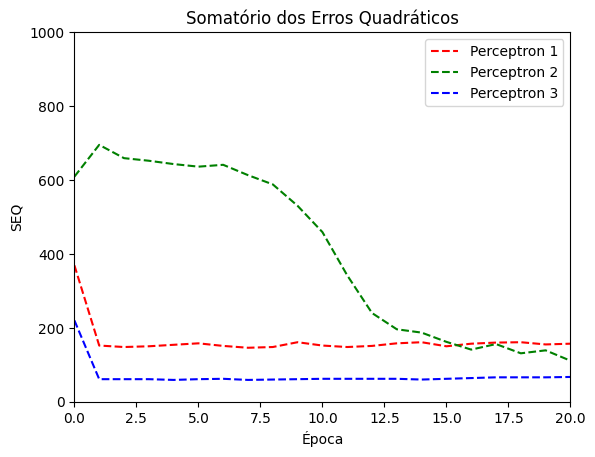

In [41]:
# Plotar o Somatório dos Erros Quadráticos (SEQ) ao longo das épocas para cada perceptron
plt.plot(vetor_seq_perceptron_momentum1, 'r--', label='Perceptron 1')
plt.plot(vetor_seq_perceptron_momentum2, 'g--', label='Perceptron 2')
plt.plot(vetor_seq_perceptron_momentum3, 'b--', label='Perceptron 3')
plt.xlim((0,20))
plt.ylim((0,1000))
plt.xlabel('Época')
plt.ylabel('SEQ')
plt.title('Somatório dos Erros Quadráticos')
plt.legend()
plt.show()

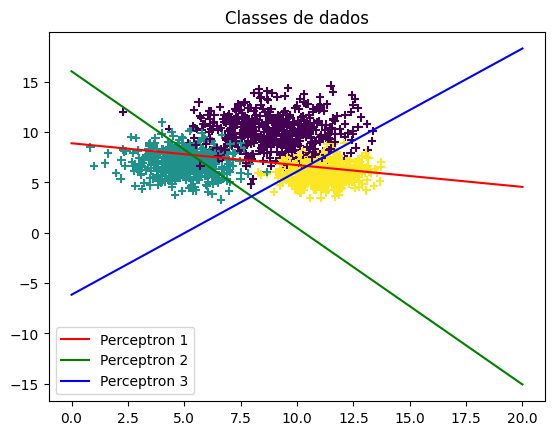

In [43]:
intervalo = [0,20] # Intervalo para plotar a reta de fronteira de decisão
# Plotar gráfico com as retas de decisão dos três perceptrons
plt.figure()
plt.scatter(X.T[0,:],X.T[1,:],marker = '+', c = yd)
plt.title('Classes de dados')

# Plotar a reta do perceptron 1
plotareta(W_perceptron_momentum1, b_perceptron_momentum1, intervalo,'r-','Perceptron 1')
# Plotar a reta do perceptron 2
plotareta(W_perceptron_momentum2, b_perceptron_momentum2, intervalo,'g-','Perceptron 2')
# Plotar a reta do perceptron 3
plotareta(W_perceptron_momentum3, b_perceptron_momentum3, intervalo,'b-','Perceptron 3')

plt.legend()
plt.show()